# Descriptive Analyses

Intro tables to give context to the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style("whitegrid",{'axes.spines.left' : False,
                           'axes.spines.right': False,
                           'axes.spines.top': False,
                           'grid.linestyle': ':'})
sns.set_context("talk")
participants = pd.read_csv("../data/processed/607d6b3929befce813fe5ba2-participants.csv",index_col=0)
posts = pd.read_csv("../data/processed/607d6b3929befce813fe5ba2-rumour-results.csv",index_col=0)
reshare_rates = pd.read_csv("../data/processed/607d6b3929befce813fe5ba2-reshare_rates.csv")
print("Shape: {}x{}".format(*reshare_rates.shape))
reshare_rates.head()

Shape: 16x32


,user_id,consent,timeSubmitted,educationLevel,attendsProtests,politicalAffiliation,age,gender_man,gender_woman,affiliatedMovements_climate,...,socialMedias_snapchat,socialMedias_tiktok,socialMedias_twitter,condition,evidence,Affirms,Denies,Neutral,Questions,rumour_proportion
0,-7159046693702464628,1,2021-05-24 11:30:25.884000+00:00,highSchool,False,centreRight,28,1,0,1,...,0,0,0,Control,High,0.0,0.0,0.0,0.0,NaN
1,-7159046693702464628,1,2021-05-24 11:30:25.884000+00:00,highSchool,False,centreRight,28,1,0,1,...,0,0,0,Control,Low,0.0,0.0,0.0,0.0,NaN
2,-6619931360310195064,1,2021-05-24 12:17:00.336000+00:00,highSchool,0,centreLeft,19,1,0,1,...,0,0,1,Treatment,High,0.1,0.0,0.0,0.5,1.0
3,-6619931360310195064,1,2021-05-24 12:17:00.336000+00:00,highSchool,0,centreLeft,19,1,0,1,...,0,0,1,Treatment,Low,0.1,0.1,0.0,0.0,0.5
4,-6058563518878514163,1,2021-05-24 11:19:59.690000+00:00,communityCollege,False,centre,50,1,0,0,...,1,1,0,Control,High,0.0,0.2,0.0,0.0,0.0


## Initial Tables

1. Participant statistics
2. Experiment descriptive statistics

### Participant statistics

In [2]:
from tableone import TableOne
table_one = TableOne(participants.reset_index().drop(["user_id","timeSubmitted","consent"],
                                                     axis=1))
table_one

Missing     Overall
n                                                                            8
educationLevel, n (%)                     communityCollege       0    1 (12.5)
                                          graduateSchool              1 (12.5)
                                          highSchool                  2 (25.0)
                                          undergrad                   4 (50.0)
attendsProtests, n (%)                    False                  1    6 (85.7)
                                          True                        1 (14.3)
politicalAffiliation, n (%)               centre                 0    1 (12.5)
                                          centreLeft                  3 (37.5)
                                          centreRight                 2 (25.0)
                                          left                        1 (12.5)
                                          none                        1 (12.5)
age, mean (SD)                                                   0  32.9 (9.3)
gender_man, mean (SD)                                            0   0.5 (0.5)
gender_woman, mean (SD)                                          0   0.5 (0.5)
affiliatedMovements_climate, mean (SD)                           0   0.8 (0.5)
affiliatedMovements_freeSpeech, mean (SD)                        0   0.9 (0.4)
affiliatedMovements_gender, mean (SD)                            0   0.9 (0.4)
affiliatedMovements_indigenous, mean (SD)                        0   0.2 (0.5)
affiliatedMovements_labour, mean (SD)                            0   0.6 (0.5)
affiliatedMovements_lgbtqa, mean (SD)                            0   0.8 (0.5)
affiliatedMovements_race, mean (SD)                              0   0.8 (0.5)
affiliatedMovements_religion, mean (SD)                          0   0.2 (0.5)
affiliatedMovements_smallGov, mean (SD)                          0   0.4 (0.5)
socialMedias_None, mean (SD)                                     0   0.1 (0.4)
socialMedias_facebook, mean (SD)                                 0   0.6 (0.5)
socialMedias_instagram, mean (SD)                                0   0.8 (0.5)
socialMedias_reddit, mean (SD)                                   0   0.8 (0.5)
socialMedias_snapchat, mean (SD)                                 0   0.1 (0.4)
socialMedias_tiktok, mean (SD)                                   0   0.1 (0.4)
socialMedias_twitter, mean (SD)                                  0   0.6 (0.5)

### Experiment descriptive statistics

In [3]:
table_two = TableOne(posts.reset_index().drop(["user_id","timeSubmitted","rumour","evidence","code","id"],
                                              axis=1),
                     groupby=["condition","evidence"],
                     pval=True)
table_two

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Grouped by condition                                                  
                                            Missing       Overall       control     treatment P-Value
n                                                             448           280           168        
secondsTaken, mean (SD)                           0  113.4 (15.0)  112.1 (17.2)  115.5 (10.1)   0.009
warning, n (%)          False                     0    400 (89.3)   280 (100.0)    120 (71.4)  <0.001
                        True                            48 (10.7)                   48 (28.6)        
reshared, n (%)         False                     0    386 (86.2)    249 (88.9)    137 (81.5)   0.040
                        True                            62 (13.8)     31 (11.1)     31 (18.5)        
clickedWarning, n (%)   False                     0    441 (98.4)   280 (100.0)    161 (95.8)   0.001
                        True                              7 (1.6)                     7 (4.2)        
timestamp, mean (SD)                              0   30.0 (17.4)   29.6 (17.2)   30.6 (17.6)   0.563
mockGender, n (%)       female                    0    217 (48.4)    132 (47.1)     85 (50.6)   0.542
                        male                           231 (51.6)    148 (52.9)     83 (49.4)

In [4]:
table_three = reshare_rates.groupby(["condition","evidence"])[["Affirms",
                                                 "Denies",
                                                 "Neutral",
                                                 "Questions",
                                                 "rumour_proportion"]].mean().T
table_three


/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


condition           Control           Treatment          
evidence               High       Low      High       Low
Affirms            0.160000  0.040000  0.200000  0.200000
Denies             0.040000  0.240000  0.066667  0.300000
Neutral            0.050000  0.050000  0.083333  0.083333
Questions          0.150000  0.100000  0.500000  0.000000
rumour_proportion  0.666667  0.133333  0.833333  0.411111

## Sample Visualizations

## Hypotheses


The presence of credibility indicators in the system will:

- $H_1$: *decrease* the *affirmation rate* for rumours with lower evidence levels.
- $H_2$: *increase* the *denial rate* for rumours with lower evidence levels.
- $H_3$: *increase* the *affirmation rate* for rumours with higher evidence levels.
- $H_4$: *decrease* the *denial rate* for rumours with higher evidence levels.

**Some visualizations**

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


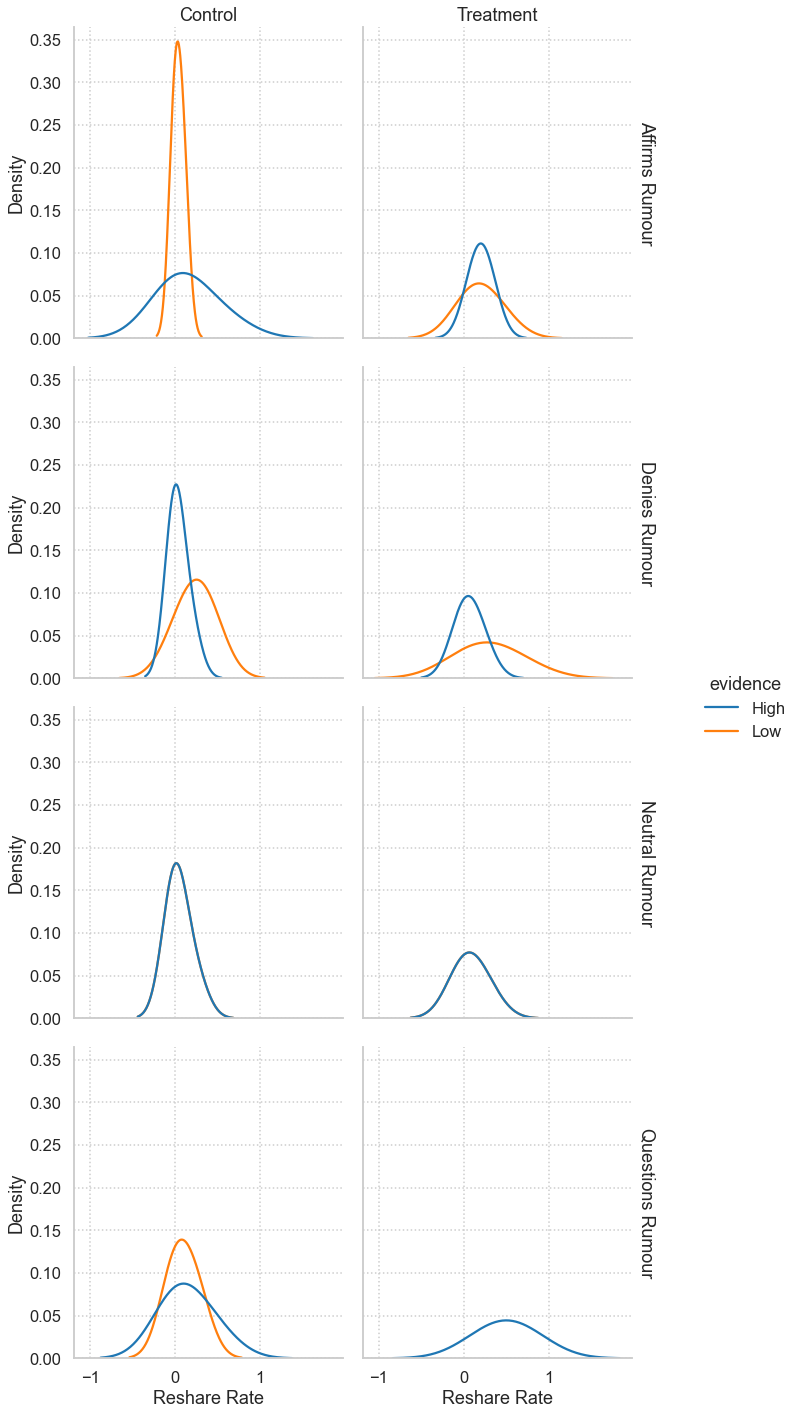

In [5]:
melted = reshare_rates.melt(id_vars=reshare_rates.columns[:-5],
                            value_vars=reshare_rates.columns[-5:-1],
                            var_name='code', 
                            value_name='reshared')
sorting_dict = {'Control': 0, 
                'Treatment': 1, 
                'Affirms': 0,
                'Denies': 1,
                'Neutral': 2,
                'Questions': 3,
                'High': 0,
                'Low': 1}
melted = melted.sort_values(by=['condition','code','evidence'],key=lambda x: x.map(sorting_dict))

g = sns.displot(data=melted, 
            x="reshared",
            hue="evidence",
            col="condition",
            row="code",
            bw_adjust=1.8,
            facet_kws={"margin_titles":True},
            kind="kde")
g.set_titles(col_template="{col_name}", row_template="{row_name} Rumour")
g.set_axis_labels(x_var="Reshare Rate")
g.fig.savefig("../figures/descriptive_analysis/reshare_rate-hist.pdf")

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


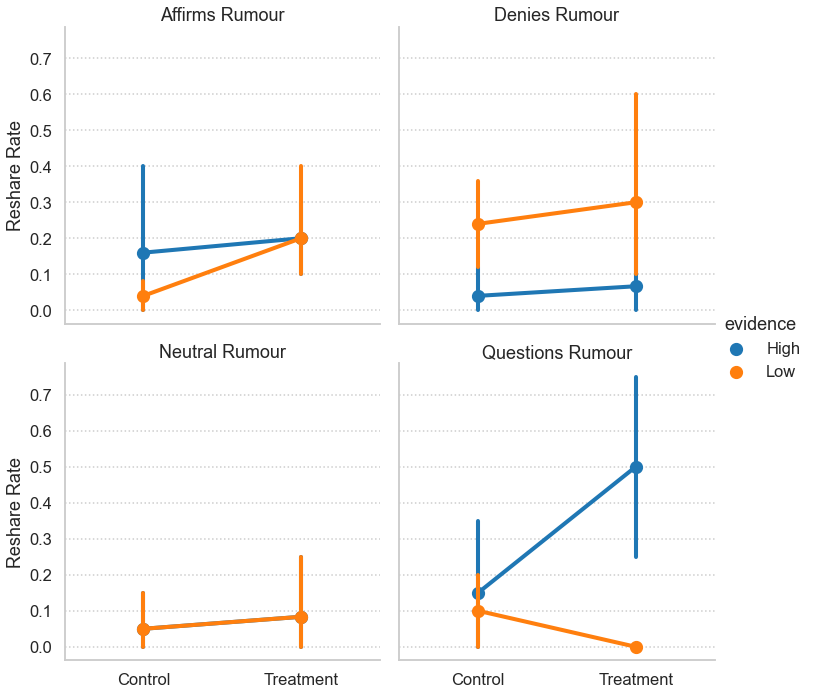

In [6]:
g = sns.catplot(data=melted, 
            x="condition",
            y="reshared",
            hue="evidence",
            col="code",
            col_wrap=2,
            margin_titles=True,
            kind="point")
g.set_titles(col_template="{col_name} Rumour",)
g.set_axis_labels(y_var="Reshare Rate",x_var="")
g.savefig("../figures/descriptive_analysis/reshare_rate-point_plot.pdf")

### Rumour Proportion Figures

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


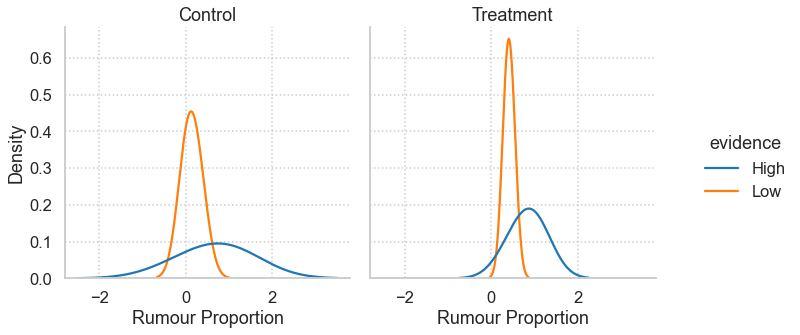

In [8]:
reshare_rates = reshare_rates.sort_values(by=['condition','evidence'],key=lambda x: x.map(sorting_dict))
g = sns.displot(data=reshare_rates, 
                x="rumour_proportion",
                hue="evidence",
                col="condition",
                bw_adjust=1.8,
                facet_kws={"margin_titles":True},
                kind="kde")
g.set_titles(col_template="{col_name}", row_template="{row_name} Rumour")
g.set_axis_labels(x_var="Rumour Proportion")
g.fig.savefig("../figures/descriptive_analysis/rumour_prop-hist.pdf")

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


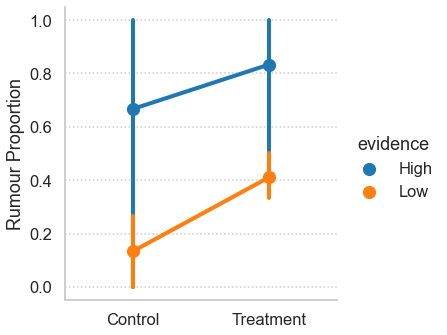

In [9]:
g = sns.catplot(data=reshare_rates, 
                x="condition",
                y="rumour_proportion",
                hue="evidence",
                margin_titles=True,
                kind="point")
g.set_titles(col_template="{col_name} Rumour",)
g.set_axis_labels(y_var="Rumour Proportion",x_var="")
g.savefig("../figures/descriptive_analysis/rumour_prop-point_plot.pdf")

**DISREGARD FROM HERE ON OUT**

*old statistical analyses that need to be refactored and moved to the system analysis script*

### $H_1$

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Add a random effect for the participant ID since there are repeated measures

md = smf.ols(f"Affirms ~ C(condition)*C(evidence) + (1 | user_id)",#"+ age + C(educationLevel) + {affil_columns} + {sm_cols} + {gender_cols} + (1|PROLIFIC_ID)",
             reshare_rates).fit()
md.summary()

In [ ]:
table = sm.stats.anova_lm(md, typ=2) # Type 2 Anova DataFrame
table

In [ ]:
md2 = smf.mixedlm(f"Affirms ~ C(condition)*C(evidence)",#"+ age + C(educationLevel) + {affil_columns} + {sm_cols} + {gender_cols} + (1|PROLIFIC_ID)",
                     reshare_rates,
                     groups=reshare_rates["user_id"]).fit()
md2.summary()